In [1]:
import numpy as np
import pandas as pd
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(17016, 3)
(7600, 3)


In [5]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  17016 non-null  int64 
 1   Title        17016 non-null  object
 2   Description  17015 non-null  object
dtypes: int64(1), object(2)
memory usage: 398.9+ KB


In [8]:
df_train['Class Index'].unique()

array([3, 4, 2, 1])

In [9]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [13]:
df_train['Class Index'].value_counts()

,count
Class Index,
4,4459
1,4355
2,4148
3,4054


In [15]:
for class_index in sorted(df_train['Class Index'].unique()):
    print(f"\n Class Index: {class_index}")
    print(df_train[df_train['Class Index'] == class_index].head(5))



 Class Index: 1
     Class Index                                              Title  \
492            1  Venezuelans Vote Early in Referendum on Chavez...   
493            1  S.Koreans Clash with Police on Iraq Troop Disp...   
494            1  Palestinians in Israeli Jails Start Hunger Str...   
495            1  Seven Georgian soldiers wounded as South Osset...   
496            1               Rwandan Troops Arrive in Darfur (AP)   

                                           Description  
492  Reuters - Venezuelans turned out early\and in ...  
493  Reuters - South Korean police used water canno...  
494  Reuters - Thousands of Palestinian\prisoners i...  
495  AFP - Sporadic gunfire and shelling took place...  
496  AP - Dozens of Rwandan soldiers flew into Suda...  

 Class Index: 2
     Class Index                                              Title  \
448            2       Phelps, Thorpe Advance in 200 Freestyle (AP)   
449            2       Reds Knock Padres Out of Wild-Ca

In [18]:
category_map = {1 : "world" , 2 : "Sports" , 3 : "Business", 4 : "sci/Tech"}

df_train['Category'] = df_train['Class Index'].map(category_map)

In [19]:
df_train.head()

,Class Index,Title,Description,Category
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business


In [21]:
X = df_train['Description']  # or df_train['Title']
y = df_train['Category']


In [23]:
X = df_train['Description'].fillna("")


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8798472385428907
              precision    recall  f1-score   support

    Business       0.86      0.83      0.84       829
      Sports       0.91      0.96      0.94       834
    sci/Tech       0.86      0.87      0.86       881
       world       0.89      0.86      0.87       860

    accuracy                           0.88      3404
   macro avg       0.88      0.88      0.88      3404
weighted avg       0.88      0.88      0.88      3404



In [30]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_df.head(10))


         Actual Predicted
3682      world     world
7660     Sports    Sports
7217      world     world
4816     Sports    Sports
7724   Business  Business
59     Business  sci/Tech
5528     Sports    Sports
14525  sci/Tech  sci/Tech
7458   Business  Business
15621     world     world


In [29]:
X_new = df_test['Description']
X_new_vec = vectorizer.transform(X_new)
predictions = model.predict(X_new_vec)
df_test['Predicted_Category'] = predictions
df_test.head()


,Class Index,Title,Description,Predicted_Category
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",sci/Tech
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,sci/Tech
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Sports
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,world


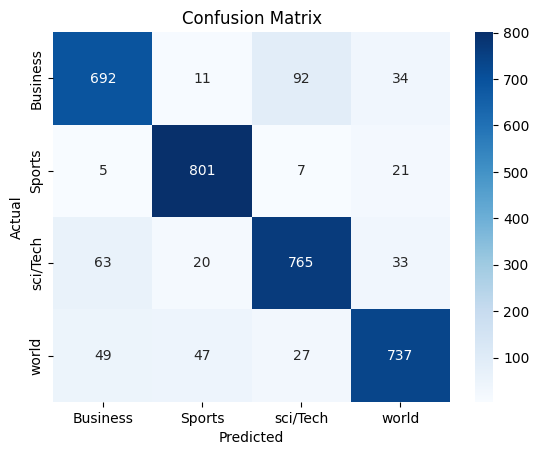

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
import joblib


joblib.dump(model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']